In [13]:
import requests
from PIL import Image ## 분석할 이미지
from io import BytesIO ## 

* requests test

In [ ]:
requests.get('https://naver.com').text

In [10]:
endpoint = 'https://labuser12computervision.cognitiveservices.azure.com/'
key = 'b2057ce35278486591de3dd6e4164aa3'

##### endpoint 주소, vision 분석 주소

In [11]:
endpoint = endpoint + 'vision/v2.0/'

In [12]:
analysisisEndpoint = endpoint + 'analyze'

In [28]:
image_url = 'https://cdn.huffingtonpost.kr/news/photo/201602/22260_43420.jpeg'

In [16]:
get_image = requests.get(image_url).content ##image url을 통해 get mappig으로 들고 오기

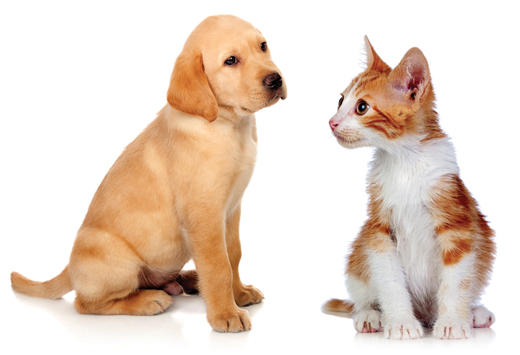

In [19]:
image = Image.open(BytesIO(get_image)) ## Image package로 imshow()
image

##### parameters for data communications

In [29]:
headers = {'Ocp-Apim-Subscription-Key' : key}
params = {'visualFeatures':'Categories,Description,Color'} ## image 정보에 대한 parameters
data = {'url': image_url}

In [30]:
response = requests.post(analysisisEndpoint,
                        headers=headers,
                        params=params,
                        json = data)

In [36]:
result = response.json()
result

{'categories': [{'name': 'animal_dog', 'score': 0.99609375}],
 'color': {'dominantColorForeground': 'White',
  'dominantColorBackground': 'White',
  'dominantColors': ['White'],
  'accentColor': '8E633D',
  'isBwImg': False,
  'isBWImg': False},
 'description': {'tags': ['sitting',
   'cat',
   'brown',
   'indoor',
   'dog',
   'looking',
   'animal',
   'staring',
   'camera',
   'standing',
   'tan',
   'front',
   'table',
   'laying',
   'close',
   'orange',
   'bed'],
  'captions': [{'text': 'a close up of a dog and a cat looking at the camera',
    'confidence': 0.8600457150249555}]},
 'requestId': '3fccd98e-74d4-49f9-9452-412dd334de72',
 'metadata': {'height': 552, 'width': 570, 'format': 'Jpeg'}}

In [32]:
detectEndpoint = endpoint + 'detect'

In [37]:
response = requests.post(detectEndpoint,
                         headers=headers,
                         params=params,
                         json=data)

In [40]:
result = response.json()
result

{'objects': [{'rectangle': {'x': 195, 'y': 53, 'w': 360, 'h': 493},
   'object': 'dog',
   'confidence': 0.92,
   'parent': {'object': 'mammal',
    'confidence': 0.934,
    'parent': {'object': 'animal', 'confidence': 0.935}}},
  {'rectangle': {'x': 0, 'y': 235, 'w': 260, 'h': 317},
   'object': 'cat',
   'confidence': 0.869,
   'parent': {'object': 'mammal',
    'confidence': 0.88,
    'parent': {'object': 'animal', 'confidence': 0.881}}}],
 'requestId': '59bddc04-8c57-4f20-97bf-46008768b305',
 'metadata': {'height': 552, 'width': 570, 'format': 'Jpeg'}}

In [33]:
from PIL import Image, ImageDraw, ImageFont

In [34]:
def MakeRectangle(result):
  objects = result['objects']

  for obj in objects:
    print(obj)

    rect = obj['rectangle']
    x = rect['x']
    y = rect['y']
    w = rect['w']
    h = rect['h']

    draw.rectangle(((x,y),(x+w,y+h)), outline='red')

In [41]:
draw = ImageDraw.Draw(image)
MakeRectangle(result)

{'rectangle': {'x': 195, 'y': 53, 'w': 360, 'h': 493}, 'object': 'dog', 'confidence': 0.92, 'parent': {'object': 'mammal', 'confidence': 0.934, 'parent': {'object': 'animal', 'confidence': 0.935}}}
{'rectangle': {'x': 0, 'y': 235, 'w': 260, 'h': 317}, 'object': 'cat', 'confidence': 0.869, 'parent': {'object': 'mammal', 'confidence': 0.88, 'parent': {'object': 'animal', 'confidence': 0.881}}}


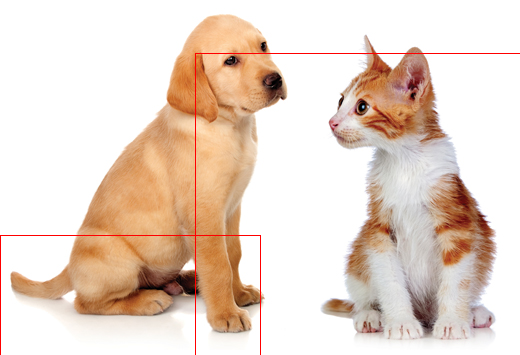

In [42]:
image